<a href="https://colab.research.google.com/github/Venckus/lt-sectors-analysis/blob/master/lt_economy_sectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of Lithuanian business income and profitability (by IVRK sectors)

##*Goals*


1. find business sectors having highest profitability ratio.
2. find business sectors having biggest sales by nominal values (euros).
3. find business sectors having smallest cyclical influences.

## Data Set 
Data is taken from government department of statistics.

Ketvirtiniai duomenys nuo 2007 metu 1 ketvircio
Data sets: 
* 'Įmonių pajamos, sąnaudos, pelnas'
- pardavimo pajamos,
- pardavimo savikaina,
- bendras pelnas nuostolis,
- veiklos sanaudos,
- pardavimo sanaudos,
- bendros ir administracines sanaudos,
- kitos veiklos rezultatai,
- ukines veiklos pelnas / nuostolis,
- finansines ir investicines veiklos pelnas / nuostolis,
- pelnas / nuostolis pries apmokestinima

Load and mount google drive and other packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Set root path

In [ ]:
!ls 'drive/My Drive/Colab Notebooks/AIacademy/class-D/project/'

data-table-10y.csv  imoniu-pajamos-sanaudos-pelnas-kableliai-full.csv
git.ipynb	    lt-economy-sectors.ipynb


In [ ]:
project_path = 'drive/My Drive/Colab Notebooks/AIacademy/class-D/project/'

##Data cleaning

Check file content

In [ ]:
df = pd.read_csv(project_path + 'data-table-10y.csv')
df.head(5)

,Laikotarpis,Rodiklis,"Pajamų, sąnaudų, pelno sudedamosios dalys","Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)",Matavimo vienetai,Reikšmė
0,2007K1,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,68087.0
1,2007K2,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,71223.0
2,2007K3,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,67552.0
3,2007K4,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,70284.0
4,2008K1,"Įmonių pajamos, sąnaudos, pelnas",Pardavimo pajamos,Miškininkystė ir žuvininkystė,tūkst. EUR,72014.0


In [ ]:
df.columns

Index(['Laikotarpis', 'Rodiklis', 'Pajamų, sąnaudų, pelno sudedamosios dalys',
       'Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)',
       'Matavimo vienetai', 'Reikšmė'],
      dtype='object')

Getting rid of unnecesary columns `matavimo vienetai` and `Rodiklis`.

In [ ]:
del df['Matavimo vienetai']
del df['Rodiklis']

In [ ]:
df.head()

,Laikotarpis,"Pajamų, sąnaudų, pelno sudedamosios dalys","Ekonominės veiklos rūšis (EVRK 2 red., 2 ženklų lygiu)",Reikšmė
0,2007K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Pardavimo pajamos,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Pardavimo pajamos,Miškininkystė ir žuvininkystė,67552.0
3,2007K4,Pardavimo pajamos,Miškininkystė ir žuvininkystė,70284.0
4,2008K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,72014.0


Renaming columns.

In [ ]:
df.columns = ['quarters', 'financial_elements', 'sectors', 'money']
df.head()

,quarters,financial_elements,sectors,money
0,2007K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Pardavimo pajamos,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Pardavimo pajamos,Miškininkystė ir žuvininkystė,67552.0
3,2007K4,Pardavimo pajamos,Miškininkystė ir žuvininkystė,70284.0
4,2008K1,Pardavimo pajamos,Miškininkystė ir žuvininkystė,72014.0


What unique different financial elements are in dataset?

In [ ]:
df['financial_elements'].unique()

array(['Pardavimo pajamos', 'Bendrasis pelnas, nuostolis (-)',
       'Bendrosios ir administracinės sąnaudos', 'Kitos veiklos pajamos',
       'Kitos veiklos sąnaudos',
       'Pelnas,  nuostolis (-) prieš apmokestinimą'], dtype=object)

We will work with `Pardavimo pajamos` and `Pelnas,  nuostolis (-) prieš apmokestinimą`

In [ ]:
df['sectors'].unique()

array(['Miškininkystė ir žuvininkystė', 'Žvejyba ir akvakultūra',
       'Kasyba ir karjerų eksploatavimas', 'Apdirbamoji gamyba',
       'Elektros, dujų, garo tiekimas ir oro kondicionavimas',
       'Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas',
       'Statyba',
       'Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas',
       'Transportas ir saugojimas',
       'Apgyvendinimo ir maitinimo paslaugų veikla',
       'Informacija ir ryšiai', 'Nekilnojamojo turto operacijos',
       'Profesinė, mokslinė ir techninė veikla',
       'Administracinė ir aptarnavimo veikla', 'Švietimas',
       'Žmonių sveikatos priežiūra ir socialinis darbas',
       'Meninė, pramoginė ir poilsio organizavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas',
       'Kita asmenų aptarnavimo veikla'], dtype=object)

Removing dublicated sectors:

'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla',

'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas'





In [ ]:
df = df[df.sectors != 'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas; kita asmenų aptarnavimo veikla']

In [ ]:
df['sectors'].unique()

array(['Miškininkystė ir žuvininkystė', 'Žvejyba ir akvakultūra',
       'Kasyba ir karjerų eksploatavimas', 'Apdirbamoji gamyba',
       'Elektros, dujų, garo tiekimas ir oro kondicionavimas',
       'Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas',
       'Statyba',
       'Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas',
       'Transportas ir saugojimas',
       'Apgyvendinimo ir maitinimo paslaugų veikla',
       'Informacija ir ryšiai', 'Nekilnojamojo turto operacijos',
       'Profesinė, mokslinė ir techninė veikla',
       'Administracinė ir aptarnavimo veikla', 'Švietimas',
       'Žmonių sveikatos priežiūra ir socialinis darbas',
       'Meninė, pramoginė ir poilsio organizavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas',
       'Kita asmenų aptarnavimo veikla'], dtype=object)

# Sales income analysis

In [131]:
sales_income = df[df['financial_elements'] == 'Pardavimo pajamos']
del sales_income['financial_elements']

In [117]:
sales_income.head()

,quarters,sectors,money
0,2007K1,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Miškininkystė ir žuvininkystė,67552.0
3,2007K4,Miškininkystė ir žuvininkystė,70284.0
4,2008K1,Miškininkystė ir žuvininkystė,72014.0


## Sectors exploration

In [ ]:
sectors = sales_income['sectors'].unique()
sectors

array(['Miškininkystė ir žuvininkystė', 'Žvejyba ir akvakultūra',
       'Kasyba ir karjerų eksploatavimas', 'Apdirbamoji gamyba',
       'Elektros, dujų, garo tiekimas ir oro kondicionavimas',
       'Vandens tiekimas, nuotekų valymas, atliekų tvarkymas ir regeneravimas',
       'Statyba',
       'Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas',
       'Transportas ir saugojimas',
       'Apgyvendinimo ir maitinimo paslaugų veikla',
       'Informacija ir ryšiai', 'Nekilnojamojo turto operacijos',
       'Profesinė, mokslinė ir techninė veikla',
       'Administracinė ir aptarnavimo veikla', 'Švietimas',
       'Žmonių sveikatos priežiūra ir socialinis darbas',
       'Meninė, pramoginė ir poilsio organizavimo veikla',
       'Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas',
       'Kita asmenų aptarnavimo veikla'], dtype=object)

In [ ]:
sectors[0]

'Miškininkystė ir žuvininkystė'

In [ ]:
sales_income[sales_income['sectors'] == sectors[0]].head()

,quarters,sectors,money
0,2007K1,Miškininkystė ir žuvininkystė,68087.0
1,2007K2,Miškininkystė ir žuvininkystė,71223.0
2,2007K3,Miškininkystė ir žuvininkystė,67552.0
3,2007K4,Miškininkystė ir žuvininkystė,70284.0
4,2008K1,Miškininkystė ir žuvininkystė,72014.0


In [ ]:
sales_income[sales_income['sectors'] == sectors[0]].describe()

,money
count,53.000000
mean,92765.037736
std,27122.402201
min,51611.000000
25%,70536.000000
50%,85900.000000
75%,117035.000000
max,147319.000000


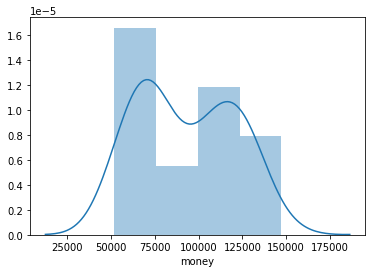

In [ ]:
sns.distplot(a=sales_income[sales_income['sectors'] == sectors[0]]['money'], label=sectors[0])


##Sales exploration

Compare all sectors absolute values of money

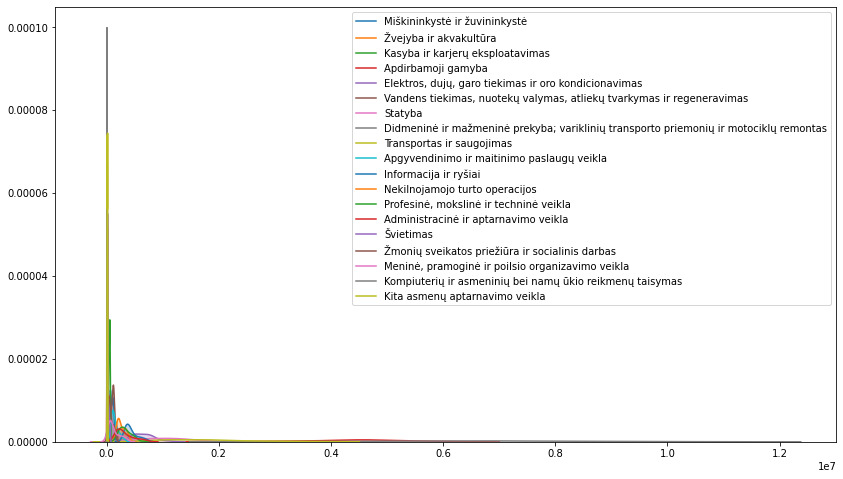

In [ ]:
plt.subplots(figsize=(14, 8))
for sector in sectors:
  sns.kdeplot(data=sales_income[sales_income['sectors'] == sector]['money'], label=sector, shade=True)

## Sales income by quarters - what is seasonal deviation in every sector?

### Exploring sectors differences using scatterplots

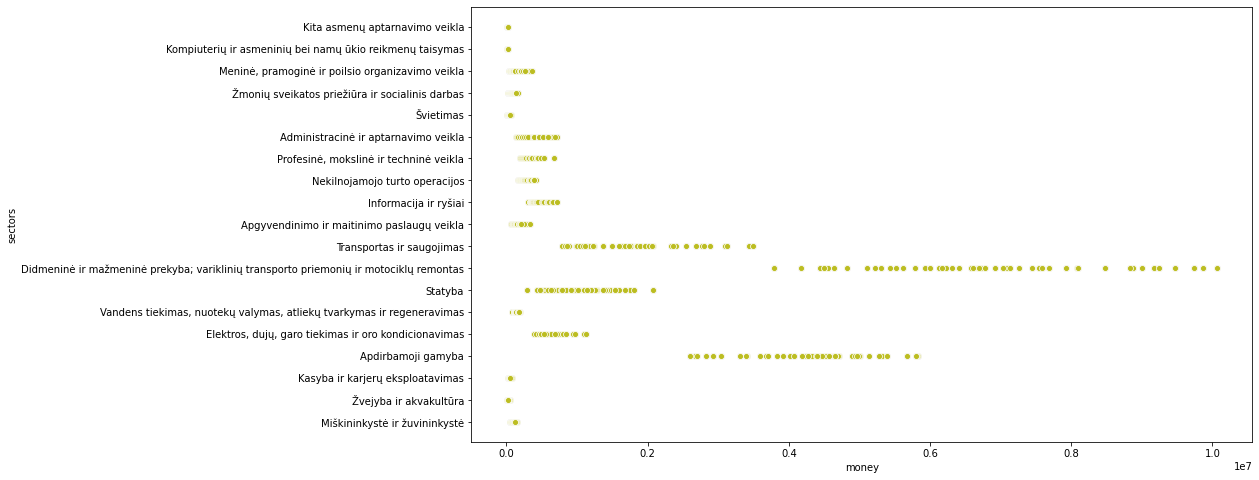

In [ ]:
plt.subplots(figsize=(14, 8))
for sector in sectors:
  sns.scatterplot(x='money', y='sectors', data=sales_income)

### Exploring sectors differences using swarmplots

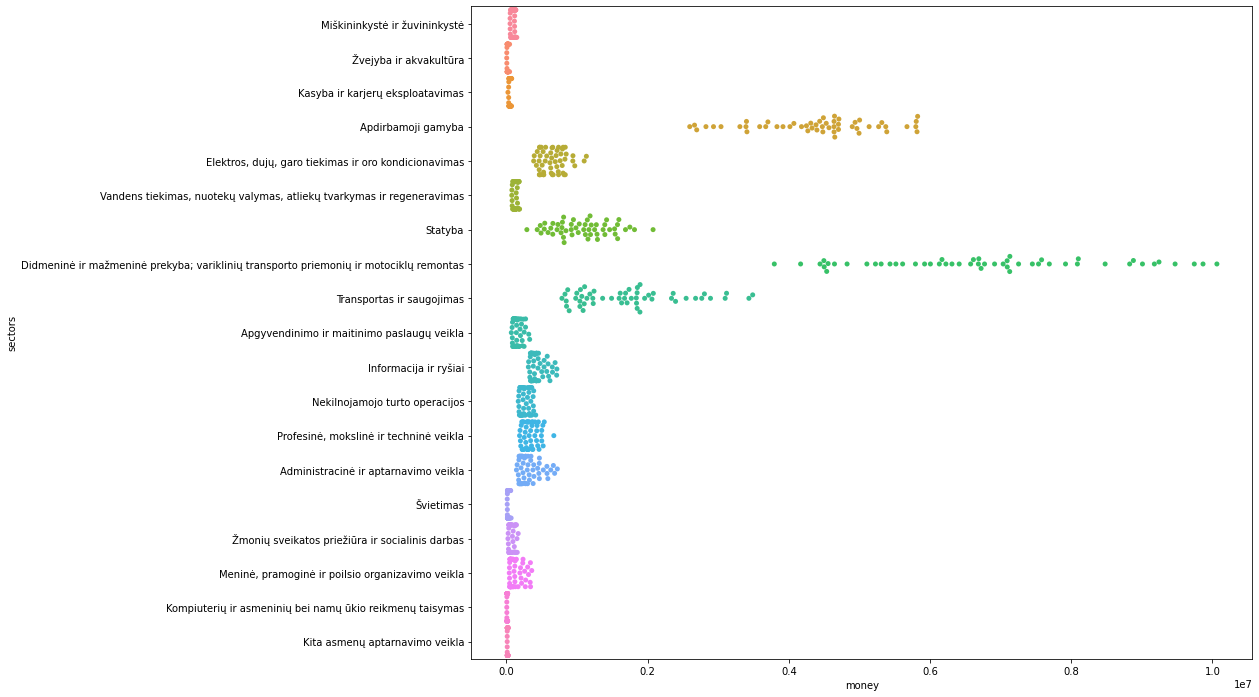

In [ ]:
plt.subplots(figsize=(14, 12))
sns.swarmplot(x=sales_income['money'], y=sales_income['sectors'])

Few sectors stands out

###Each sector quarterly percentage change from previous

In [ ]:
sales_income['change_percent'] = (sales_income.money.pct_change() * 100).round(2)
sales_income.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,quarters,sectors,money,change_percent
0,2007K1,Miškininkystė ir žuvininkystė,68087.0,NaN
1,2007K2,Miškininkystė ir žuvininkystė,71223.0,4.61
2,2007K3,Miškininkystė ir žuvininkystė,67552.0,-5.15
3,2007K4,Miškininkystė ir žuvininkystė,70284.0,4.04
4,2008K1,Miškininkystė ir žuvininkystė,72014.0,2.46


Fix missing and anomaly values when sector changes

In [ ]:
sales_income.change_percent = np.where(sales_income.quarters == '2007K1', 0, sales_income.change_percent)
sales_income.loc[sales_income['quarters'] == '2007K1']

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,quarters,sectors,money,change_percent
0,2007K1,Miškininkystė ir žuvininkystė,68087.0,0.0
53,2007K1,Žvejyba ir akvakultūra,17538.0,0.0
106,2007K1,Kasyba ir karjerų eksploatavimas,35189.0,0.0
159,2007K1,Apdirbamoji gamyba,2664364.0,0.0
212,2007K1,"Elektros, dujų, garo tiekimas ir oro kondicion...",650387.0,0.0
265,2007K1,"Vandens tiekimas, nuotekų valymas, atliekų tva...",83351.0,0.0
318,2007K1,Statyba,793229.0,0.0
371,2007K1,Didmeninė ir mažmeninė prekyba; variklinių tra...,4646667.0,0.0
424,2007K1,Transportas ir saugojimas,847187.0,0.0
477,2007K1,Apgyvendinimo ir maitinimo paslaugų veikla,96333.0,0.0


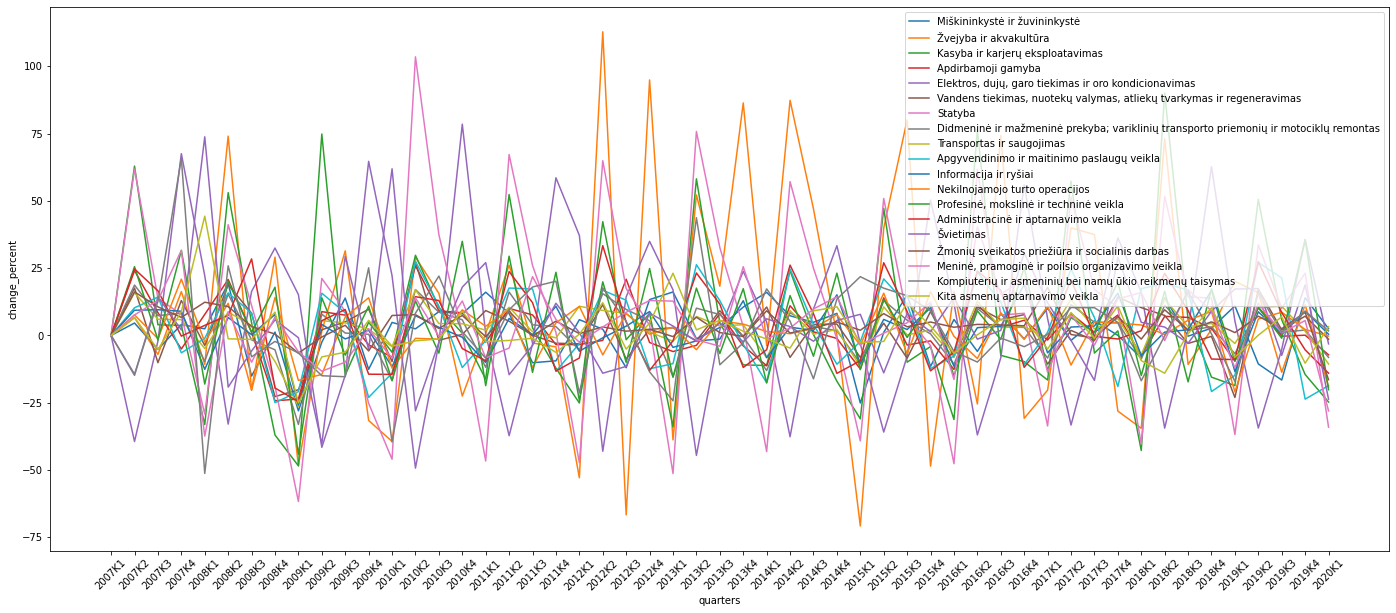

In [ ]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=sales_income['quarters'].loc[sales_income['sectors'] == sector], y=sales_income['change_percent'].loc[sales_income['sectors'] == sector], label=sector)


In [ ]:
# check min, max statistics
sales_income['change_percent'].describe()

count    1007.00000
mean        3.57148
std        20.39937
min       -70.79000
25%        -5.93000
50%         2.68000
75%        10.81000
max       112.83000
Name: change_percent, dtype: float64

### Each sector quarterly nominal (eur) change

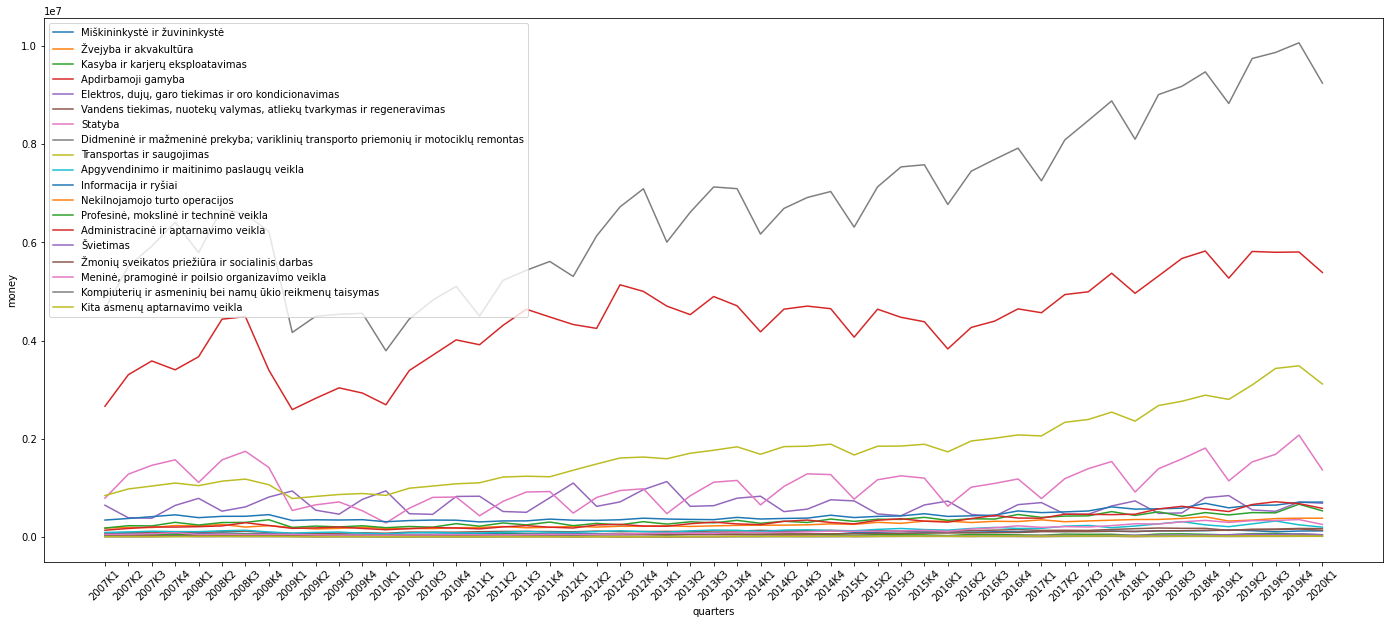

In [ ]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=sales_income['quarters'].loc[sales_income['sectors'] == sector],
               y=sales_income['money'].loc[sales_income['sectors'] == sector], label=sector)

4 sectors stand out.

In [ ]:
sectors_highest_sales = (sales_income.groupby('sectors')
                                     .money.agg([np.mean])
                                     .round(2)
                                     .sort_values(by=['mean'],  ascending=False)
                        )

In [ ]:
sectors_highest_sales

,mean
sectors,
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,6753990.42
Apdirbamoji gamyba,4371654.36
Transportas ir saugojimas,1733733.58
Statyba,1071447.34
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",659471.72
Informacija ir ryšiai,441444.91
"Profesinė, mokslinė ir techninė veikla",337391.34
Administracinė ir aptarnavimo veikla,325248.74
Nekilnojamojo turto operacijos,263287.34


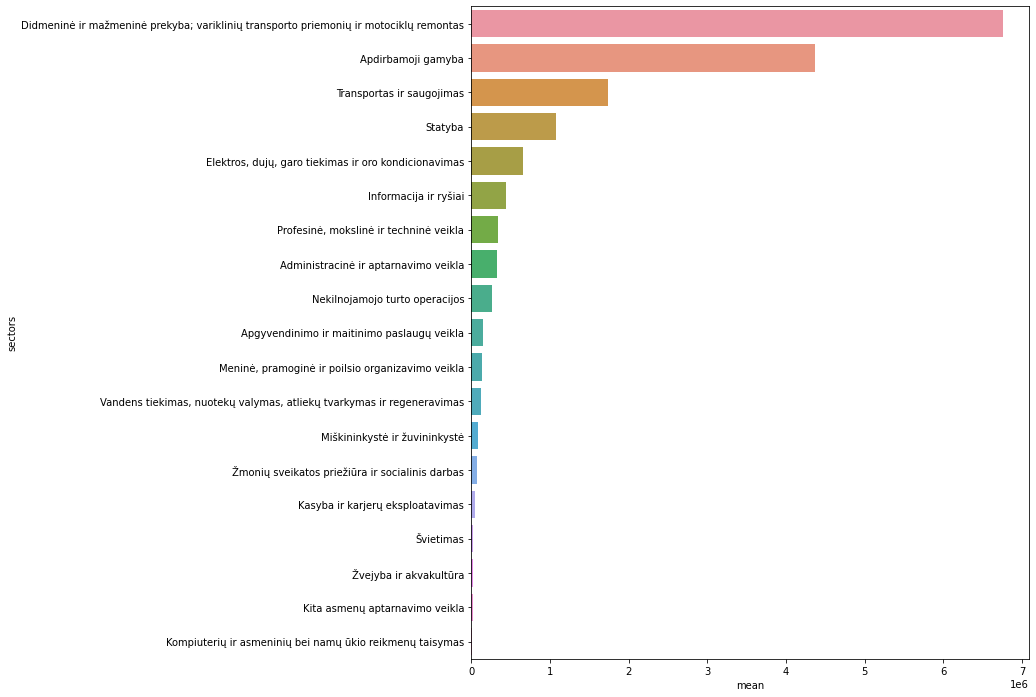

In [ ]:
plt.subplots(figsize=(10, 12))
sns.barplot(x="mean", y=sectors_highest_sales.index, data=sectors_highest_sales)

## Same quarter each year
from `2007 q1` up to `2020 q1`

In [ ]:
quarter1_list = [f'{2007+x}K1' for x in range(14)]
quarter2_list = [f'{2007+x}K2' for x in range(13)]
quarter3_list = [f'{2007+x}K3' for x in range(13)]
quarter4_list = [f'{2007+x}K4' for x in range(13)]
quarter4_list

['2007K4',
 '2008K4',
 '2009K4',
 '2010K4',
 '2011K4',
 '2012K4',
 '2013K4',
 '2014K4',
 '2015K4',
 '2016K4',
 '2017K4',
 '2018K4',
 '2019K4']

In [ ]:
quarter1_std = (sales_income.loc[sales_income.quarters.isin(quarter1_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q1_std'})
                            )
quarter2_std = (sales_income.loc[sales_income.quarters.isin(quarter2_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q2_std'})
                            )
quarter3_std = (sales_income.loc[sales_income.quarters.isin(quarter3_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q3_std'})
                            )
quarter4_std = (sales_income.loc[sales_income.quarters.isin(quarter4_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q4_std'})
                            )

In [ ]:
quarter1_std#.loc['std']

,Q1_std
sectors,
Administracinė ir aptarnavimo veikla,145052.69
Apdirbamoji gamyba,919095.03
Apgyvendinimo ir maitinimo paslaugų veikla,52411.65
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,1697109.46
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",148026.76
Informacija ir ryšiai,121691.53
Kasyba ir karjerų eksploatavimas,7633.84
Kita asmenų aptarnavimo veikla,4109.40
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,3701.04


### Join all quarters std into one dataframe

In [ ]:
quarters_std = (quarter1_std.join(quarter2_std,on='sectors')
                        .join(quarter3_std,on='sectors')
                        .join(quarter4_std,on='sectors')
)
quarters_std

,Q1_std,Q2_std,Q3_std,Q4_std
sectors,,,,
Administracinė ir aptarnavimo veikla,145052.69,156970.48,165150.93,158838.79
Apdirbamoji gamyba,919095.03,815511.71,788539.96,897449.32
Apgyvendinimo ir maitinimo paslaugų veikla,52411.65,63534.41,76476.21,57009.46
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,1697109.46,1610257.33,1597005.21,1641508.08
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",148026.76,65787.90,95267.18,94463.98
Informacija ir ryšiai,121691.53,99293.11,100871.84,123200.64
Kasyba ir karjerų eksploatavimas,7633.84,9244.72,11211.14,8891.35
Kita asmenų aptarnavimo veikla,4109.40,3918.33,4471.99,4820.23
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,3701.04,3153.67,3654.85,4198.97


### quarterly income std vs sectors heatmap

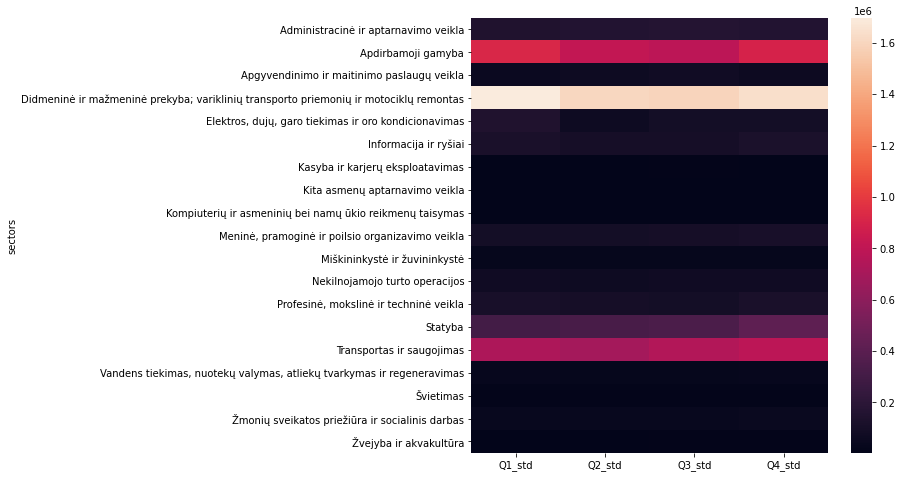

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(quarters_std)

### Join all quarters sales std percentage

In [ ]:
quarter1_tmp =  (sales_income.loc[sales_income.quarters.isin(quarter1_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
quarter1_tmp['q1_std_pct'] =((quarter1_tmp['std'] / quarter1_tmp['mean']) * 100).round(2)

quarter2_tmp =  (sales_income.loc[sales_income.quarters.isin(quarter2_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
quarter2_tmp['q2_std_pct'] =((quarter2_tmp['std'] / quarter2_tmp['mean']) * 100).round(2)

quarter3_tmp =  (sales_income.loc[sales_income.quarters.isin(quarter3_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
quarter3_tmp['q3_std_pct'] =((quarter3_tmp['std'] / quarter3_tmp['mean']) * 100).round(2)

quarter4_tmp =  (sales_income.loc[sales_income.quarters.isin(quarter4_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
quarter4_tmp['q4_std_pct'] =((quarter4_tmp['std'] / quarter4_tmp['mean']) * 100).round(2)
quarter1_tmp

,std,mean,q1_std_pct
sectors,,,
Administracinė ir aptarnavimo veikla,145052.69,289958.29,50.03
Apdirbamoji gamyba,919095.03,4060951.79,22.63
Apgyvendinimo ir maitinimo paslaugų veikla,52411.65,132978.86,39.41
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,1697109.46,6206441.00,27.34
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",148026.76,834108.29,17.75
Informacija ir ryšiai,121691.53,428715.29,28.39
Kasyba ir karjerų eksploatavimas,7633.84,38280.29,19.94
Kita asmenų aptarnavimo veikla,4109.40,16837.43,24.41
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,3701.04,10477.79,35.32


In [ ]:
del(quarter1_tmp['std'], quarter1_tmp['mean'],
      quarter2_tmp['std'], quarter2_tmp['mean'],
      quarter3_tmp['std'], quarter3_tmp['mean'],
      quarter4_tmp['std'], quarter4_tmp['mean'])

In [ ]:
quarters_std_pct = (quarter1_tmp.join(quarter2_tmp, on='sectors')
                                                              .join(quarter3_tmp, on='sectors')
                                                              .join(quarter4_tmp, on='sectors')
)
quarters_std_pct

,q1_std_pct,q2_std_pct,q3_std_pct,q4_std_pct
sectors,,,,
Administracinė ir aptarnavimo veikla,50.03,47.97,45.80,48.72
Apdirbamoji gamyba,22.63,18.71,17.22,19.90
Apgyvendinimo ir maitinimo paslaugų veikla,39.41,41.07,43.83,38.91
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,27.34,24.00,22.86,22.94
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",17.75,12.77,18.43,12.45
Informacija ir ryšiai,28.39,23.41,23.29,25.63
Kasyba ir karjerų eksploatavimas,19.94,16.06,19.42,16.95
Kita asmenų aptarnavimo veikla,24.41,23.85,26.66,27.41
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,35.32,29.72,33.19,34.97


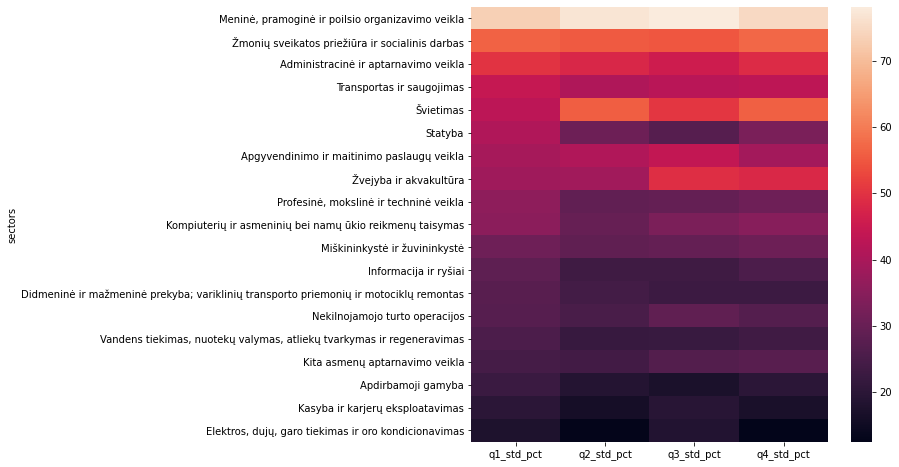

In [202]:
plt.subplots(figsize=(8, 8))
sns.heatmap(quarters_std_pct.sort_values(by=['q1_std_pct'],  ascending=False))

#Profit analysis

In [127]:
profit = df[df['financial_elements'] == 'Pelnas,  nuostolis (-) prieš apmokestinimą']
del profit['financial_elements']

##Profit exploration

In [116]:
profit.head()

,quarters,sectors,money
5300,2007K1,Miškininkystė ir žuvininkystė,15644.0
5301,2007K2,Miškininkystė ir žuvininkystė,8802.0
5302,2007K3,Miškininkystė ir žuvininkystė,12263.0
5303,2007K4,Miškininkystė ir žuvininkystė,4235.0
5304,2008K1,Miškininkystė ir žuvininkystė,9025.0


In [45]:
profit['money'].describe()

count      1007.000000
mean      46444.678252
std       93819.442952
min     -432774.000000
25%         916.000000
50%        8768.000000
75%       57252.000000
max      769797.000000
Name: money, dtype: float64

#### Exploring sectors profit using scatterplot

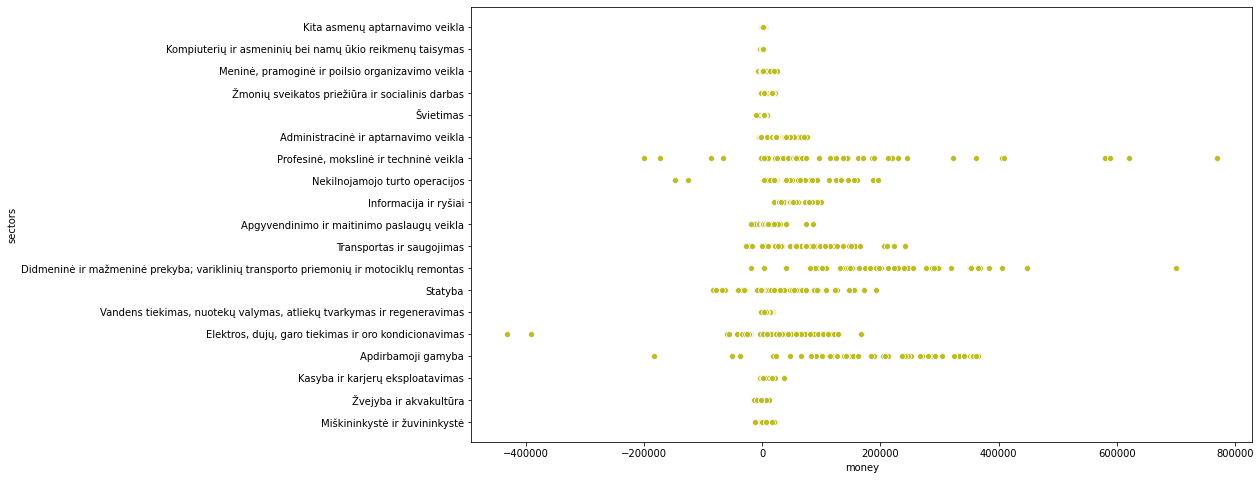

In [46]:
plt.subplots(figsize=(14, 8))
for sector in sectors:
  sns.scatterplot(x='money', y='sectors', data=profit)

#### Exploring sectors profit using swarmplot

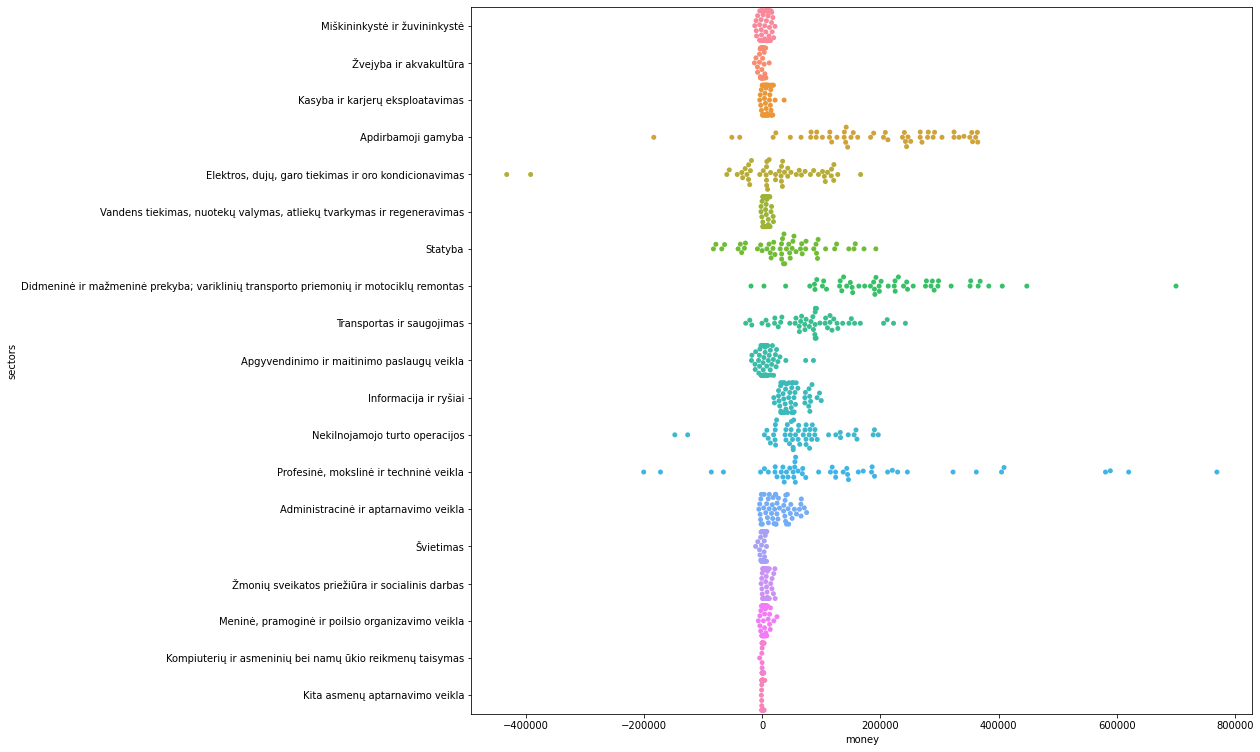

In [47]:
plt.subplots(figsize=(14, 13))
sns.swarmplot(x=profit['money'], y=profit['sectors'])

###Each sector quarterly percentage change

In [48]:
profit['change_percent'] = (profit.money.pct_change() * 100).round(2)
profit.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,quarters,sectors,money,change_percent
5300,2007K1,Miškininkystė ir žuvininkystė,15644.0,NaN
5301,2007K2,Miškininkystė ir žuvininkystė,8802.0,-43.74
5302,2007K3,Miškininkystė ir žuvininkystė,12263.0,39.32
5303,2007K4,Miškininkystė ir žuvininkystė,4235.0,-65.47
5304,2008K1,Miškininkystė ir žuvininkystė,9025.0,113.11


In [49]:
profit.change_percent = np.where(profit.quarters == '2007K1', 0, profit.change_percent)
profit.loc[profit['quarters'] == '2007K1']

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,quarters,sectors,money,change_percent
5300,2007K1,Miškininkystė ir žuvininkystė,15644.0,0.0
5353,2007K1,Žvejyba ir akvakultūra,533.0,0.0
5406,2007K1,Kasyba ir karjerų eksploatavimas,5798.0,0.0
5459,2007K1,Apdirbamoji gamyba,92155.0,0.0
5512,2007K1,"Elektros, dujų, garo tiekimas ir oro kondicion...",105083.0,0.0
5565,2007K1,"Vandens tiekimas, nuotekų valymas, atliekų tva...",1072.0,0.0
5618,2007K1,Statyba,35913.0,0.0
5671,2007K1,Didmeninė ir mažmeninė prekyba; variklinių tra...,224790.0,0.0
5724,2007K1,Transportas ir saugojimas,62816.0,0.0
5777,2007K1,Apgyvendinimo ir maitinimo paslaugų veikla,1721.0,0.0


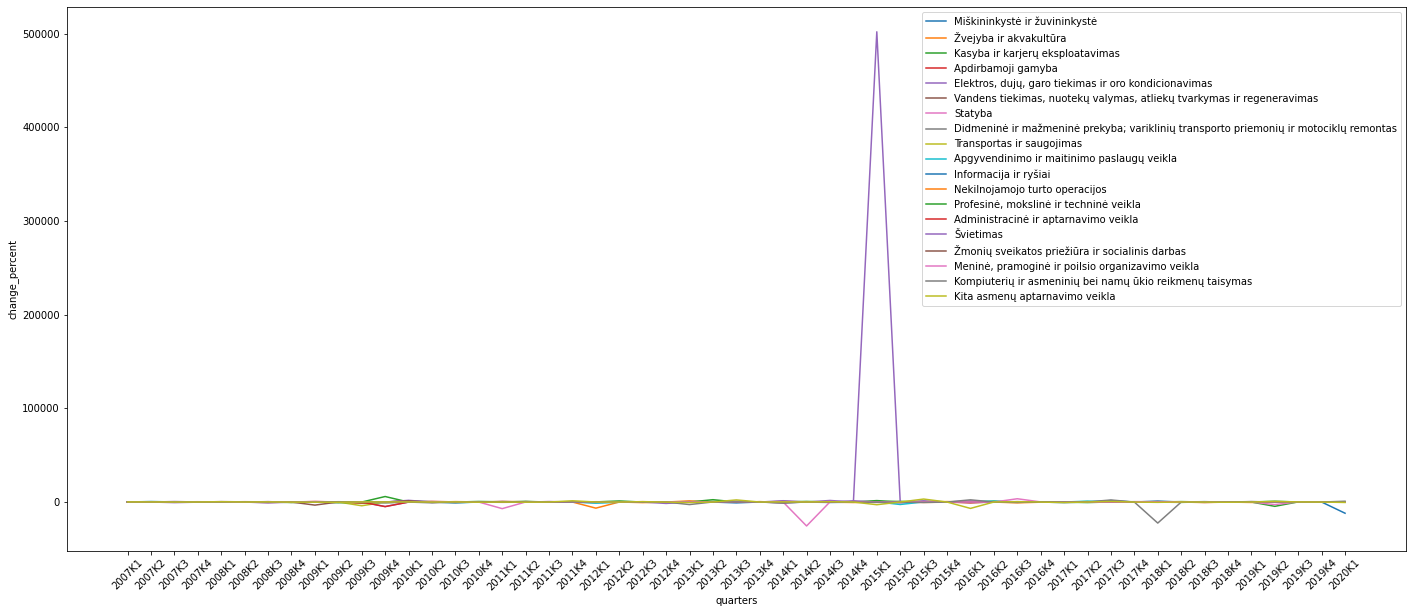

In [50]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=profit['quarters'].loc[profit['sectors'] == sector],
               y=profit['change_percent'].loc[profit['sectors'] == sector], label=sector)

### Each sector quarterly nominal (eur) change

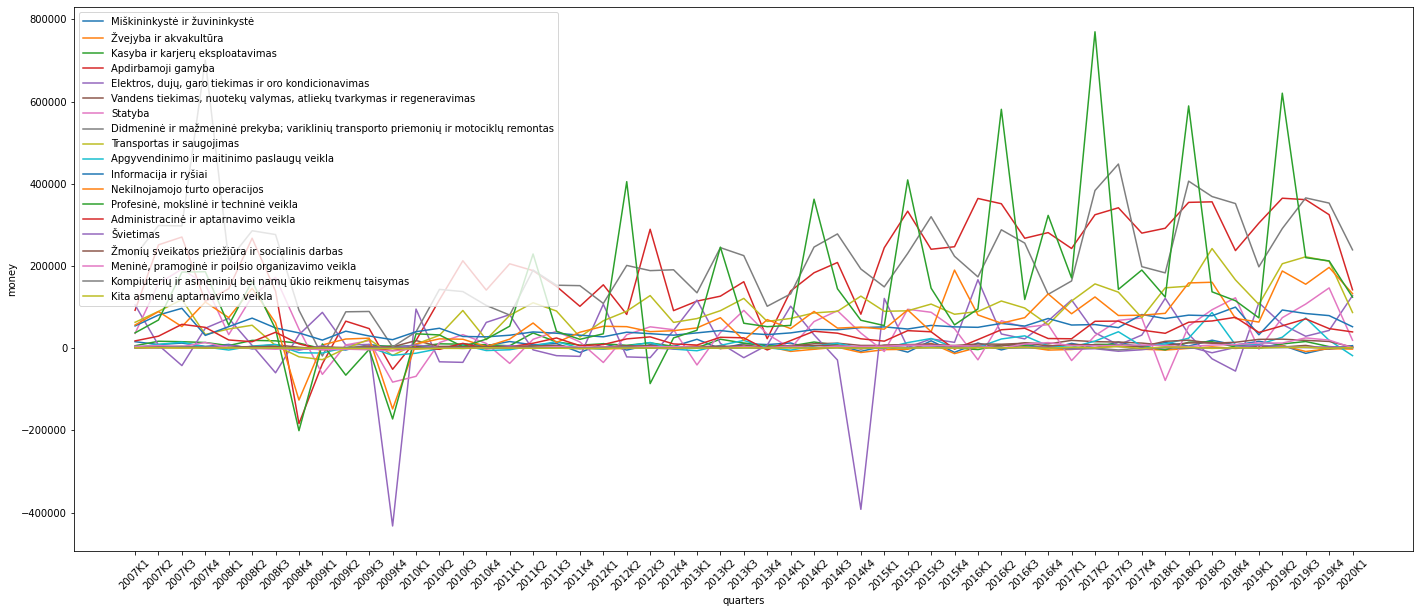

In [51]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=profit['quarters'].loc[profit['sectors'] == sector],
               y=profit['money'].loc[profit['sectors'] == sector], label=sector)

## Same quarter each year
from `2007 q1` up to `2020 q1`

In [52]:
profit_q1_std = (sales_income.loc[sales_income.quarters.isin(quarter1_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q1_std'})
                            )
profit_q2_std = (sales_income.loc[sales_income.quarters.isin(quarter2_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q2_std'})
                            )
profit_q3_std = (sales_income.loc[sales_income.quarters.isin(quarter3_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q3_std'})
                            )
profit_q4_std = (sales_income.loc[sales_income.quarters.isin(quarter4_list)]
                              .groupby('sectors')
                              .money.agg([np.std])
                              .round(2)
                              .rename(columns={'std': 'Q4_std'})
                            )

In [53]:
profit_qs_std = (profit_q1_std.join(profit_q2_std,on='sectors')
                        .join(profit_q3_std,on='sectors')
                        .join(profit_q4_std,on='sectors')
)
profit_qs_std

,Q1_std,Q2_std,Q3_std,Q4_std
sectors,,,,
Administracinė ir aptarnavimo veikla,145052.69,156970.48,165150.93,158838.79
Apdirbamoji gamyba,919095.03,815511.71,788539.96,897449.32
Apgyvendinimo ir maitinimo paslaugų veikla,52411.65,63534.41,76476.21,57009.46
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,1697109.46,1610257.33,1597005.21,1641508.08
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",148026.76,65787.90,95267.18,94463.98
Informacija ir ryšiai,121691.53,99293.11,100871.84,123200.64
Kasyba ir karjerų eksploatavimas,7633.84,9244.72,11211.14,8891.35
Kita asmenų aptarnavimo veikla,4109.40,3918.33,4471.99,4820.23
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,3701.04,3153.67,3654.85,4198.97


### quarterly profit std vs sectors heatmap

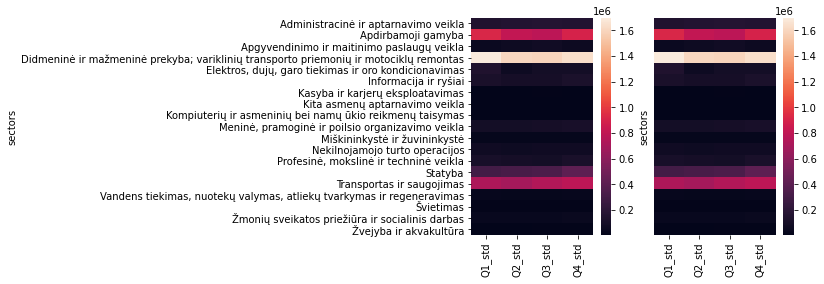

In [54]:
fig, ax = plt.subplots(1, 2)
sns.heatmap(profit_qs_std, ax=ax[0])
sns.heatmap(quarters_std, ax=ax[1], yticklabels=False)
fig.show()

### Join all quarters sales std percentage

In [65]:
profit_q1_tmp = (profit.loc[profit.quarters.isin(quarter1_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q1_tmp['q1_std_pct'] = ((profit_q1_tmp['std'] / profit_q1_tmp['mean']) * 100).round(2)

profit_q2_tmp = (profit.loc[profit.quarters.isin(quarter2_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q2_tmp['q2_std_pct'] = ((profit_q2_tmp['std'] / profit_q2_tmp['mean']) * 100).round(2)

profit_q3_tmp =  (profit.loc[profit.quarters.isin(quarter3_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q3_tmp['q3_std_pct'] =((profit_q3_tmp['std'] / profit_q3_tmp['mean']) * 100).round(2)

profit_q4_tmp = (profit.loc[profit.quarters.isin(quarter4_list)]
                                  .groupby('sectors')
                                  .money.agg([np.std, np.mean])
                                  .round(2)
                                )
profit_q4_tmp['q4_std_pct'] =((profit_q4_tmp['std'] / profit_q4_tmp['mean']) * 100).round(2)
profit_q4_tmp
# .sort_values(by=['std_pct'],  ascending=True)

,std,mean,q4_std_pct
sectors,,,
Administracinė ir aptarnavimo veikla,25669.66,21149.69,121.37
Apdirbamoji gamyba,146097.19,129845.62,112.52
Apgyvendinimo ir maitinimo paslaugų veikla,8967.32,401.08,2235.79
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,175886.13,214926.77,81.84
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",167826.64,-42449.69,-395.35
Informacija ir ryšiai,25359.15,49728.08,51.00
Kasyba ir karjerų eksploatavimas,4039.48,5428.77,74.41
Kita asmenų aptarnavimo veikla,655.23,-135.15,-484.82
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,794.97,310.31,256.19


In [66]:
del(profit_q1_tmp['std'], profit_q1_tmp['mean'],
      profit_q2_tmp['std'], profit_q2_tmp['mean'],
      profit_q3_tmp['std'], profit_q3_tmp['mean'],
      profit_q4_tmp['std'], profit_q4_tmp['mean'])

In [67]:
sales_qs_std_pct = (profit_q1_tmp.join(profit_q2_tmp, on='sectors')
                                                              .join(profit_q3_tmp, on='sectors')
                                                              .join(profit_q4_tmp, on='sectors')
)
sales_qs_std_pct

,q1_std_pct,q2_std_pct,q3_std_pct,q4_std_pct
sectors,,,,
Administracinė ir aptarnavimo veikla,76.04,71.25,55.38,121.37
Apdirbamoji gamyba,64.34,47.64,40.01,112.52
Apgyvendinimo ir maitinimo paslaugų veikla,-275.14,83.64,96.75,2235.79
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,50.52,34.69,39.11,81.84
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",21.09,191.81,-218.62,-395.35
Informacija ir ryšiai,31.91,32.03,41.67,51.00
Kasyba ir karjerų eksploatavimas,181.41,71.64,40.19,74.41
Kita asmenų aptarnavimo veikla,150.14,202.11,173.80,-484.82
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,95.41,132.23,430.85,256.19


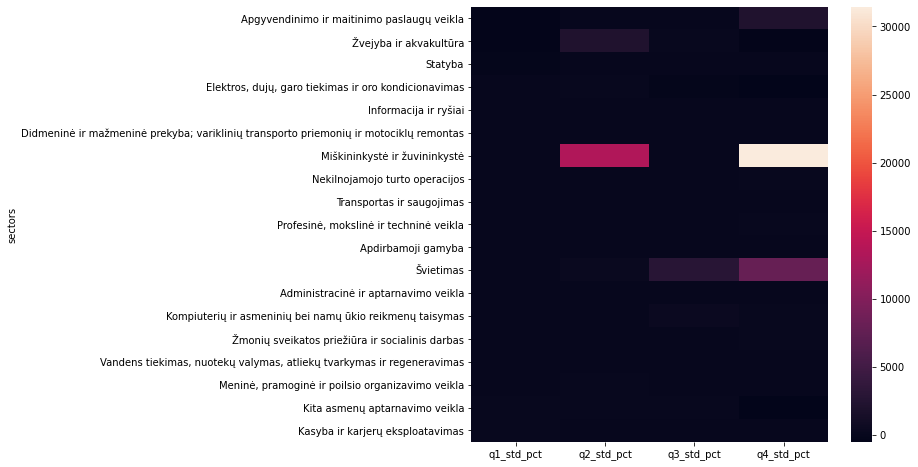

In [201]:
plt.subplots(figsize=(8, 8))
sns.heatmap(sales_qs_std_pct.sort_values(by=['q1_std_pct'],  ascending=True))

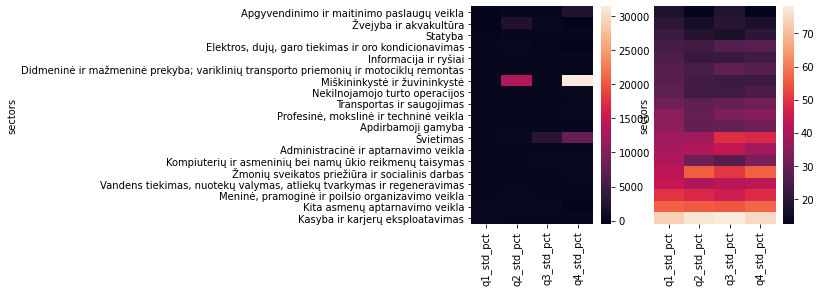

In [200]:
fig, ax = plt.subplots(1, 2)
sns.heatmap(sales_qs_std_pct.sort_values(by=['q1_std_pct']), ax=ax[0])
sns.heatmap(quarters_std_pct.sort_values(by=['q1_std_pct']), ax=ax[1], yticklabels=False)
fig.show()

# Profitability (profit / income)

In [170]:
profit_index = profit.copy(deep=True)

In [171]:
# del(profit['change_percent'], sales_income['change_percent'])
profit_index = profit.set_index(['quarters', 'sectors'])#
sales_income = sales_income.set_index(['quarters', 'sectors'])#

KeyError: ignored

In [172]:
profit_index.head()
# sales_income.head()

,,money
quarters,sectors,
2007K1,Miškininkystė ir žuvininkystė,15644.0
2007K2,Miškininkystė ir žuvininkystė,8802.0
2007K3,Miškininkystė ir žuvininkystė,12263.0
2007K4,Miškininkystė ir žuvininkystė,4235.0
2008K1,Miškininkystė ir žuvininkystė,9025.0


In [173]:
profit_index = profit_index.join(sales_income['money'], on=['quarters', 'sectors'], how='left', lsuffix='_profit', rsuffix='_sales')
profit_index.head()

,,money_profit,money_sales
quarters,sectors,,
2007K1,Miškininkystė ir žuvininkystė,15644.0,68087.0
2007K2,Miškininkystė ir žuvininkystė,8802.0,71223.0
2007K3,Miškininkystė ir žuvininkystė,12263.0,67552.0
2007K4,Miškininkystė ir žuvininkystė,4235.0,70284.0
2008K1,Miškininkystė ir žuvininkystė,9025.0,72014.0


In [174]:
profit_index['profit_index'] = ((profit_index['money_profit'] / profit_index['money_sales']) * 100).round(2)
profit_index = profit_index.reset_index()
profit_index.head()

,quarters,sectors,money_profit,money_sales,profit_index
0,2007K1,Miškininkystė ir žuvininkystė,15644.0,68087.0,22.98
1,2007K2,Miškininkystė ir žuvininkystė,8802.0,71223.0,12.36
2,2007K3,Miškininkystė ir žuvininkystė,12263.0,67552.0,18.15
3,2007K4,Miškininkystė ir žuvininkystė,4235.0,70284.0,6.03
4,2008K1,Miškininkystė ir žuvininkystė,9025.0,72014.0,12.53


In [184]:
#profit_index = profit_index.drop(columns=['money_profit', 'money_sales'])
profit_index = profit_index.drop(columns= 'money_sales')
profit_index.head()

,quarters,sectors,profit_index
0,2007K1,Miškininkystė ir žuvininkystė,22.98
1,2007K2,Miškininkystė ir žuvininkystė,12.36
2,2007K3,Miškininkystė ir žuvininkystė,18.15
3,2007K4,Miškininkystė ir žuvininkystė,6.03
4,2008K1,Miškininkystė ir žuvininkystė,12.53


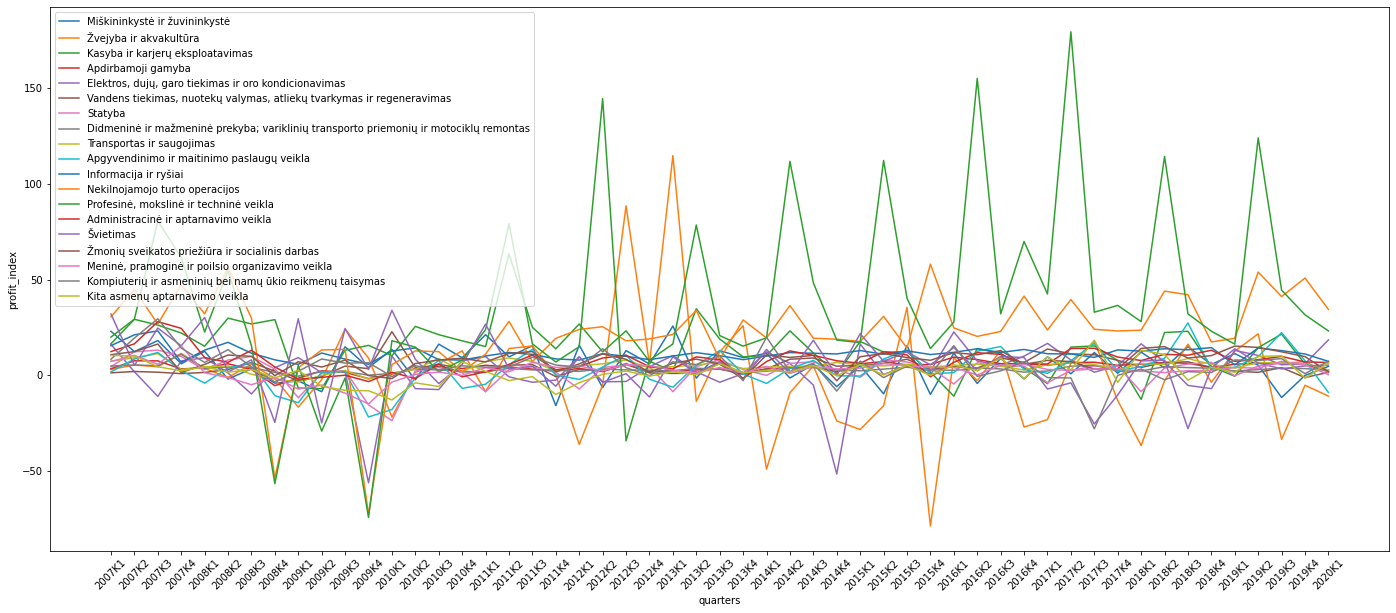

In [190]:
plt.subplots(figsize=(24, 10))
plt.xticks(rotation=45)
for sector in sectors:
  sns.lineplot(x=profit_index['quarters'].loc[profit_index['sectors'] == sector],
               y=profit_index['profit_index'].loc[profit_index['sectors'] == sector], label=sector)

##Same quarter each year

In [193]:
profit_i_q1 = (profit_index.loc[profit_index.quarters.isin(quarter1_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q1_mean'})
                            )
profit_i_q2 = (profit_index.loc[profit_index.quarters.isin(quarter2_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q2_mean'})
                            )
profit_i_q3 = (profit_index.loc[profit_index.quarters.isin(quarter3_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q3_mean'})
                            )
profit_i_q4 = (profit_index.loc[profit_index.quarters.isin(quarter4_list)]
                              .groupby('sectors')
                              .profit_index.agg([np.mean])
                              .round(2)
                              .rename(columns={'mean': 'Q4_mean'})
                            )

In [195]:
profit_i_qs_mean = (profit_i_q1.join(profit_i_q2,on='sectors')
                        .join(profit_i_q3,on='sectors')
                        .join(profit_i_q4,on='sectors')
)
profit_i_qs_mean

,Q1_mean,Q2_mean,Q3_mean,Q4_mean
sectors,,,,
Administracinė ir aptarnavimo veikla,5.64,8.83,10.98,5.60
Apdirbamoji gamyba,4.02,5.18,5.03,2.51
Apgyvendinimo ir maitinimo paslaugų veikla,-3.56,6.05,12.88,-1.61
Didmeninė ir mažmeninė prekyba; variklinių transporto priemonių ir motociklų remontas,2.26,3.73,3.65,2.93
"Elektros, dujų, garo tiekimas ir oro kondicionavimas",13.60,2.66,-2.27,-5.35
Informacija ir ryšiai,10.48,13.49,11.87,9.84
Kasyba ir karjerų eksploatavimas,5.77,22.23,19.21,10.78
Kita asmenų aptarnavimo veikla,3.48,2.16,3.59,-0.91
Kompiuterių ir asmeninių bei namų ūkio reikmenų taisymas,6.60,5.72,4.84,2.03


### Heat map of profitability index

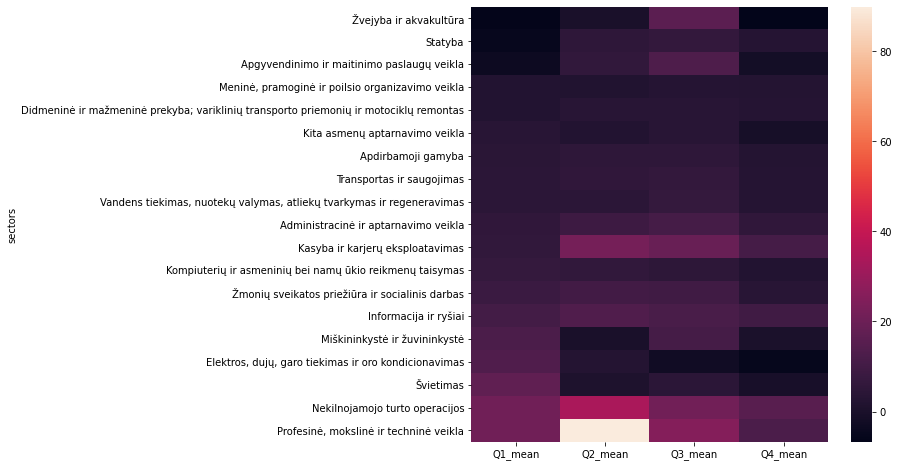

In [199]:
plt.subplots(figsize=(8, 8))
sns.heatmap(profit_i_qs_mean.sort_values(by=['Q1_mean'],  ascending=True))